In [104]:
from google.colab import files
uploaded = files.upload()

Saving concrete_data.csv to concrete_data (1).csv


**Buissness Problem** : The quality of concrete is determined by its compressive strength, which is measured
using a conventional crushing test on a concrete cylinder. The strength of the concrete
is also a vital aspect in achieving the requisite longevity. It will take 28 days to test
strength, which is a long period. So, what will we do now? We can save a lot of time and
effort by using Data Science to estimate how much quantity of which raw material we
need for acceptable compressive strength.

In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv("concrete_data.csv")

In [107]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [109]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


 **EDA**

In [110]:
# EDA
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [111]:
df.duplicated().sum()

25

In [112]:
df = df.drop_duplicates()

In [113]:
df.duplicated().sum()

0

In [114]:
df.shape

(1005, 9)

Visuvalization

In [115]:
import seaborn as sns

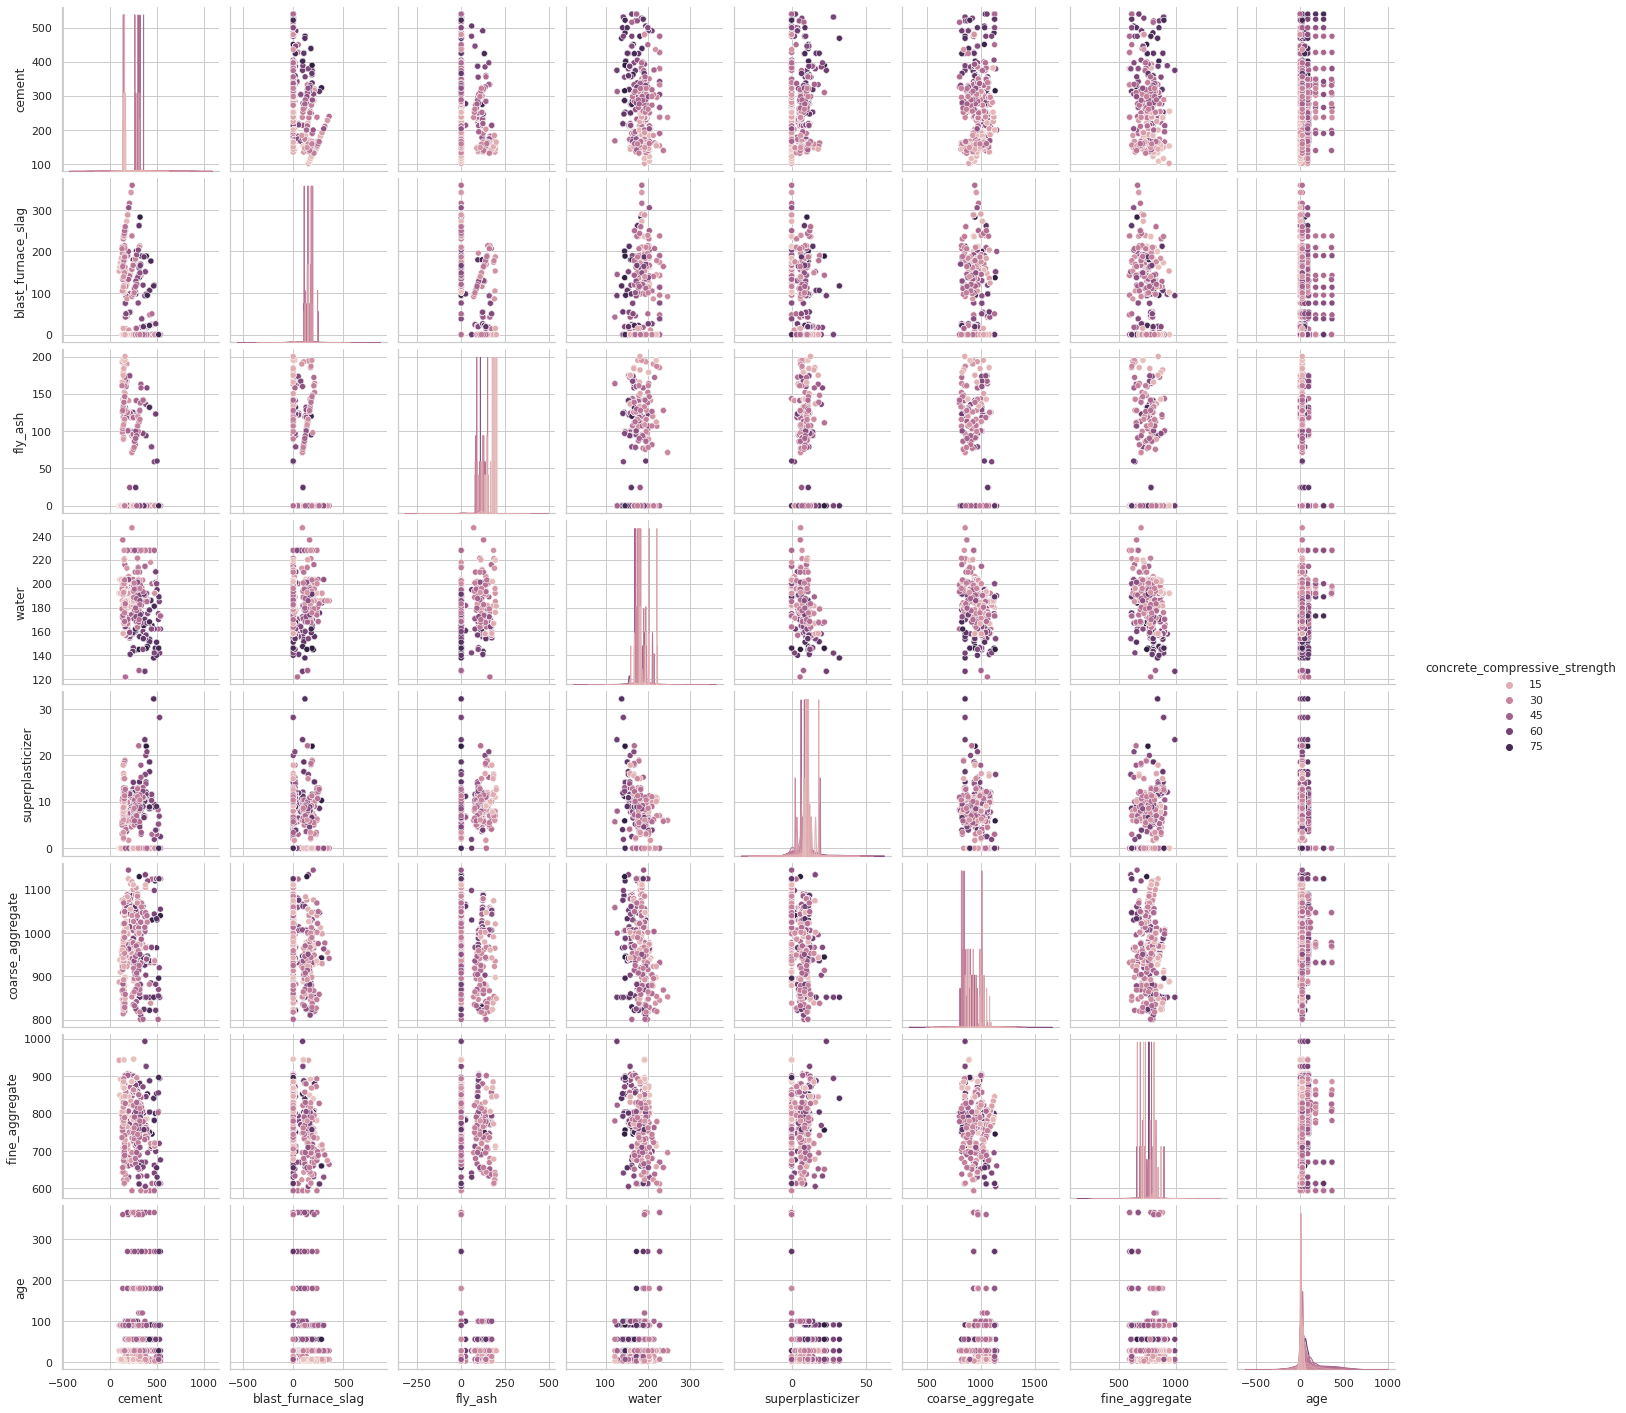

In [116]:
sns.pairplot(df,hue="concrete_compressive_strength")

In [117]:
df.describe().round(2).style.background_gradient(cmap='Blues')


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.630000,72.040000,55.540000,182.080000,6.030000,974.380000,772.690000,45.860000,35.250000
std,104.340000,86.170000,64.210000,21.340000,5.920000,77.580000,80.340000,63.730000,16.280000
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation


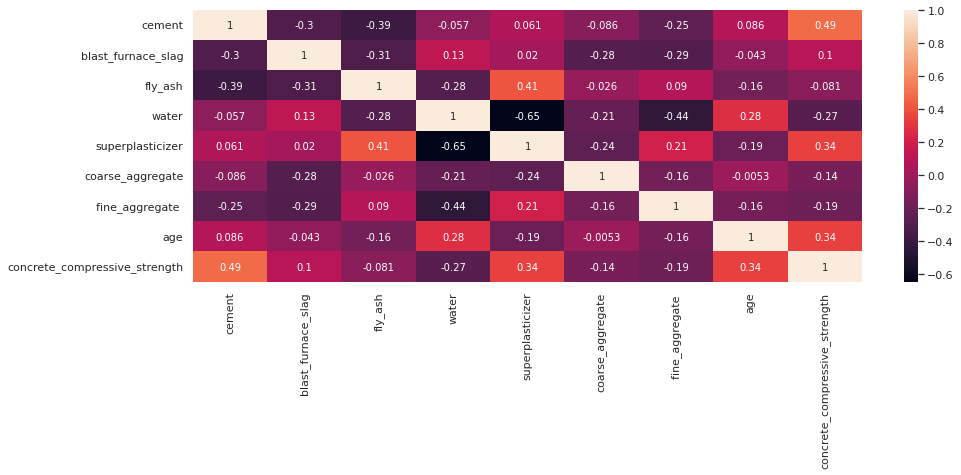

In [119]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)

In [120]:
corr_matrix = df.corr()


In [121]:
 corr_matrix["concrete_compressive_strength"].sort_values(ascending=False)


concrete_compressive_strength    1.000000
cement                           0.488283
superplasticizer                 0.344209
age                              0.337367
blast_furnace_slag               0.103374
fly_ash                         -0.080648
coarse_aggregate                -0.144717
fine_aggregate                  -0.186448
water                           -0.269624
Name: concrete_compressive_strength, dtype: float64

In [122]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

# Outliers

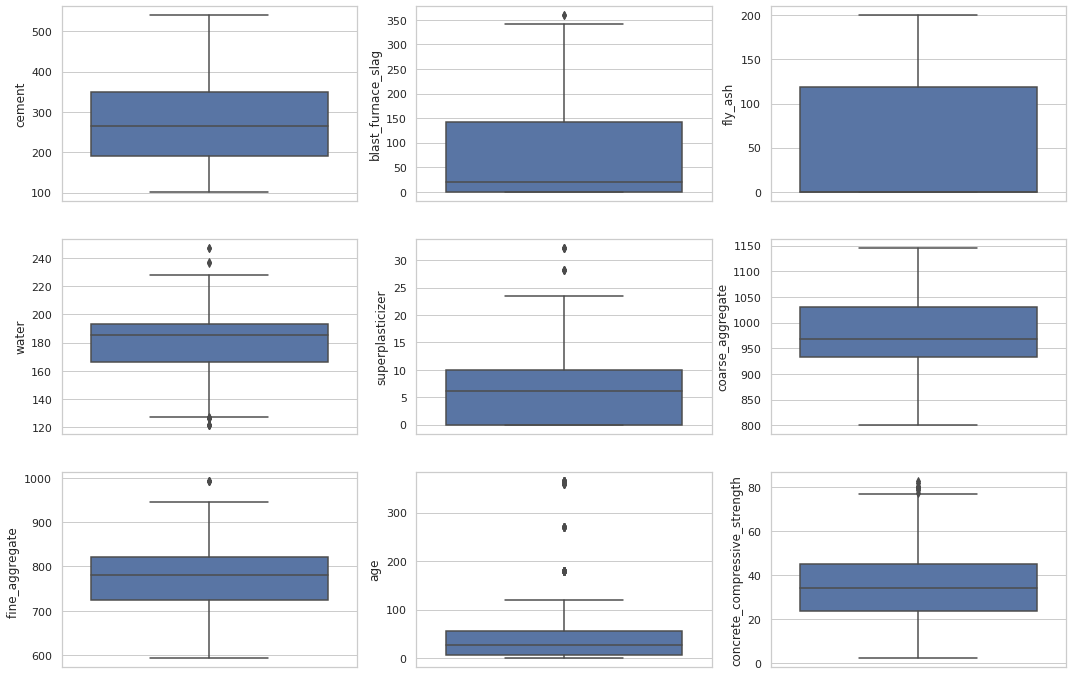

In [123]:
i=1
plt.figure(figsize=(18,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature])
    i+=1

# Model Building

In [124]:
from sklearn.model_selection import train_test_split


In [125]:
X = df.drop('concrete_compressive_strength', axis=1)
y = df.concrete_compressive_strength

In [126]:
X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [127]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1005, dtype: float64

In [128]:
from sklearn.preprocessing import StandardScaler


In [129]:
def preprocess_input(df):
    df = df.copy()
    
    y = df['concrete_compressive_strength'].copy()
    X = df.drop('concrete_compressive_strength', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [130]:
X_train, X_test, y_train, y_test = preprocess_input(df)


# Ridge 

In [131]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr

Ridge()

In [132]:
rr.fit(X_train,y_train)


Ridge()

In [133]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.6220964731733245
0.5614784592318519


In [134]:
rr_pred=rr.predict(X_test)

In [135]:
from sklearn.metrics import r2_score
rr_score= r2_score(y_test,rr_pred)*100
print("Accuracy score for Ridge Regressor: ", rr_score)

Accuracy score for Ridge Regressor:  56.147845923185194


# RandomForest

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()
rf

RandomForestRegressor()

In [137]:
rf.fit(X_train,y_train)


RandomForestRegressor()

In [138]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9818291570936635
0.8979318157169635


In [139]:
rf_pred=rf.predict(X_test)

In [140]:
from sklearn.metrics import r2_score
rfr_score= r2_score(y_test,rf_pred)*100
print("Accuracy score for Random Forest Regressor: ", rfr_score)

Accuracy score for Random Forest Regressor:  89.79318157169635


# Extra Tress


In [141]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()

In [142]:
et.fit(X_train,y_train)


ExtraTreesRegressor()

In [143]:
print(et.score(X_train,y_train))
print(et.score(X_test,y_test))

0.9961537338366308
0.9082951192286559


In [144]:
et_pred=et.predict(X_test)


In [145]:
from sklearn.metrics import r2_score
et_score= r2_score(y_test,et_pred)*100
print("Accuracy score for Random Forest Regressor: ", et_score)

Accuracy score for Random Forest Regressor:  90.82951192286559


In [146]:
pd.DataFrame({'Model Name':['RandomForest Reg','ExtraTree Reg','Ridge'],
             "Accuracy Score":[rfr_score,et_score,rr_score]})

,Model Name,Accuracy Score
0,RandomForest Reg,89.793182
1,ExtraTree Reg,90.829512
2,Ridge,56.147846


In [147]:
import numpy as np


In [148]:
sample = pd.DataFrame({'Actual Rating': y_test,
                       'Predicted Rating': np.round(et_pred,2)})
sample

,Actual Rating,Predicted Rating
951,19.01,19.22
654,24.29,24.47
706,26.32,26.40
538,34.57,34.63
389,44.13,43.34
...,...,...
605,6.47,10.32
961,44.87,44.40
394,52.30,42.39
7,36.45,39.20


In [149]:
import pickle

In [150]:
import pickle
pickle.dump(et,open('et.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))